In [18]:
import yfinance as yf

btc = yf.download("BTC-USD", start="2025-07-06", end="2025-08-06", interval="1h")
eth = yf.download("ETH-USD", start="2025-07-06", end="2025-08-06", interval="1h")

print(btc.head(24))



/var/folders/tx/w6h_l95x6612vyhm8b7dd5tm0000gn/T/ipykernel_66570/2277055640.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download("BTC-USD", start="2025-07-06", end="2025-08-06", interval="1h")
[*********************100%***********************]  1 of 1 completed
/var/folders/tx/w6h_l95x6612vyhm8b7dd5tm0000gn/T/ipykernel_66570/2277055640.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  eth = yf.download("ETH-USD", start="2025-07-06", end="2025-08-06", interval="1h")
[*********************100%***********************]  1 of 1 completed

Price                              Close           High            Low  \
Ticker                           BTC-USD        BTC-USD        BTC-USD   
Datetime                                                                 
2025-07-06 00:00:00+00:00  108238.179688  108276.765625  108148.648438   
2025-07-06 01:00:00+00:00  108239.968750  108243.968750  108147.039062   
2025-07-06 02:00:00+00:00  108166.234375  108288.851562  108160.539062   
2025-07-06 03:00:00+00:00  108088.851562  108155.015625  108072.312500   
2025-07-06 04:00:00+00:00  108025.804688  108130.468750  107999.898438   
2025-07-06 05:00:00+00:00  108036.500000  108054.031250  107997.781250   
2025-07-06 06:00:00+00:00  108179.546875  108245.515625  108015.218750   
2025-07-06 07:00:00+00:00  108082.539062  108211.546875  108077.507812   
2025-07-06 08:00:00+00:00  108033.875000  108099.421875  108005.718750   
2025-07-06 09:00:00+00:00  107890.593750  108090.875000  107890.593750   
2025-07-06 10:00:00+00:00  108022.4062

OK: (744, 6) (744, 6)


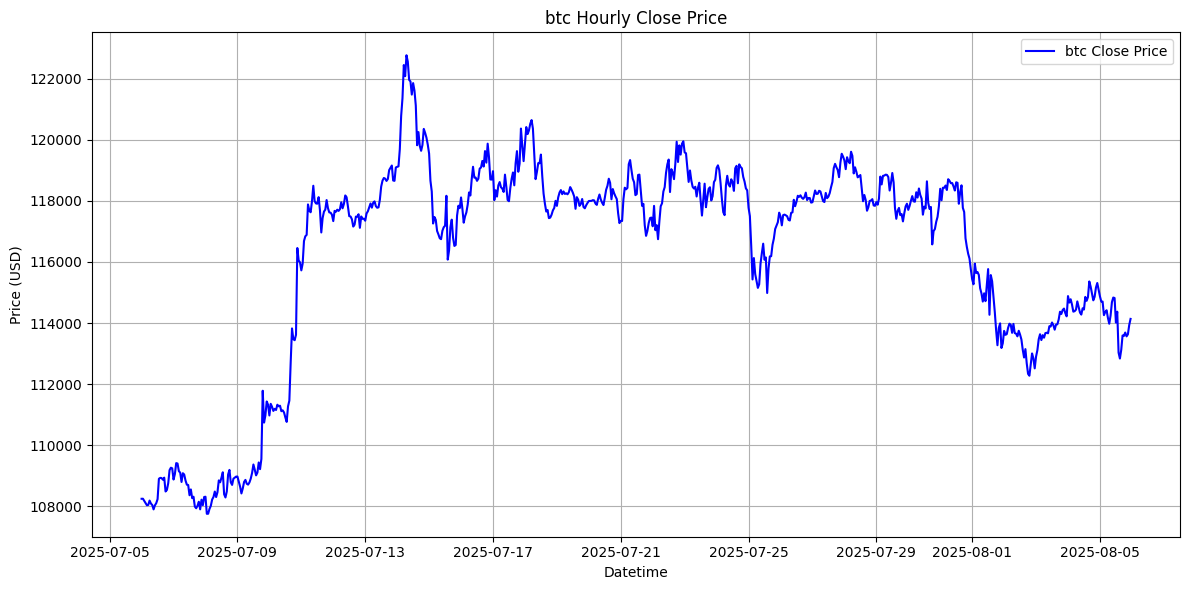

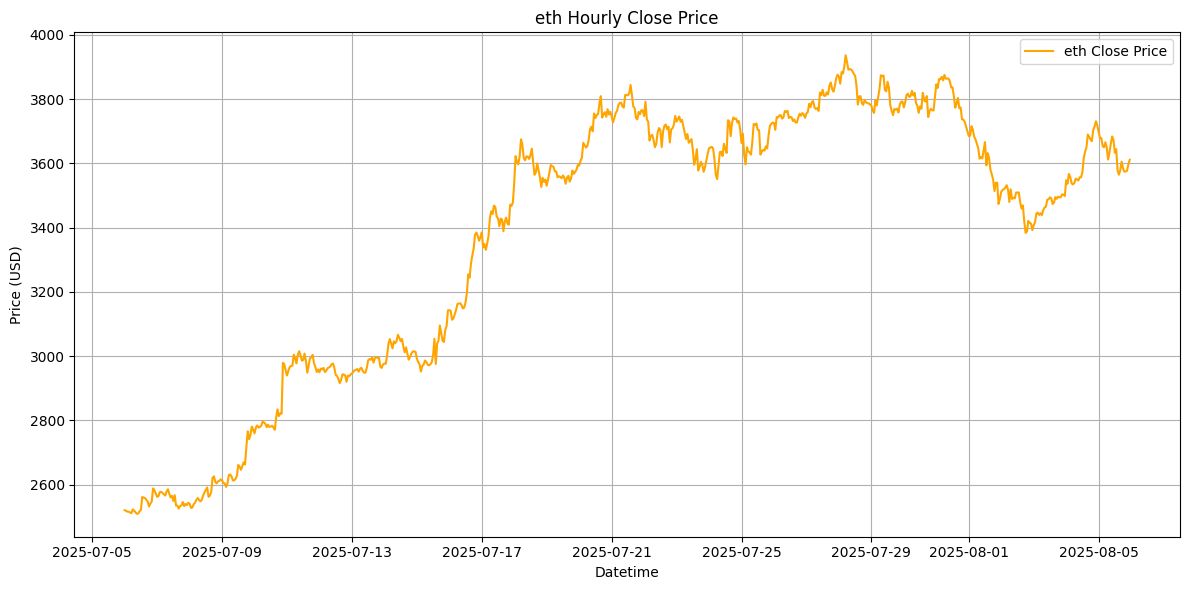

In [19]:
import pandas as pd

btc = btc.reset_index()
btc['Datetime'] = pd.to_datetime(btc['Datetime'])

eth = eth.reset_index()
eth['Datetime'] = pd.to_datetime(eth['Datetime'])

btc.to_csv("BTC_1m_hourly.csv", index=False)
eth.to_csv("ETH_1m_hourly.csv", index=False)


print("OK:", btc.shape, eth.shape)

# plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(btc['Datetime'], btc['Close'], label='btc Close Price', color='blue')

plt.title('btc Hourly Close Price')
plt.xlabel('Datetime')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(eth['Datetime'], eth['Close'], label='eth Close Price', color='orange')
plt.title('eth Hourly Close Price')
plt.xlabel('Datetime')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
import pandas as pd
import numpy as np


# 假设 eth 是 Series（价格列）
# 转成一维 numpy 数组

eth_nonlag = eth[2:]     # t
eth_lag1   = eth[1:-1]   # t-1
eth_lag2   = eth[0:-2]  # t-2

btc_nolag = btc[2:]
btc_lag1   = btc[1:-1]
btc_lag2   = btc[0:-2]


# eth loc close price
Eth_y_t = eth_nonlag['Close'].values
Eth_y_t_1 = eth_lag1['Close'].values
Eth_y_t_2 = eth_lag2['Close'].values

# btc loc close price
Btc_y_t = btc_nolag['Close'].values
Btc_y_t_1 = btc_lag1['Close'].values
Btc_y_t_2 = btc_lag2['Close'].values

# matrix A
A = np.hstack([Eth_y_t_1/1000, Eth_y_t_2/1000, Btc_y_t_1/100000, Btc_y_t_2/100000]).astype(float)
y = Eth_y_t.astype(float) / 1000



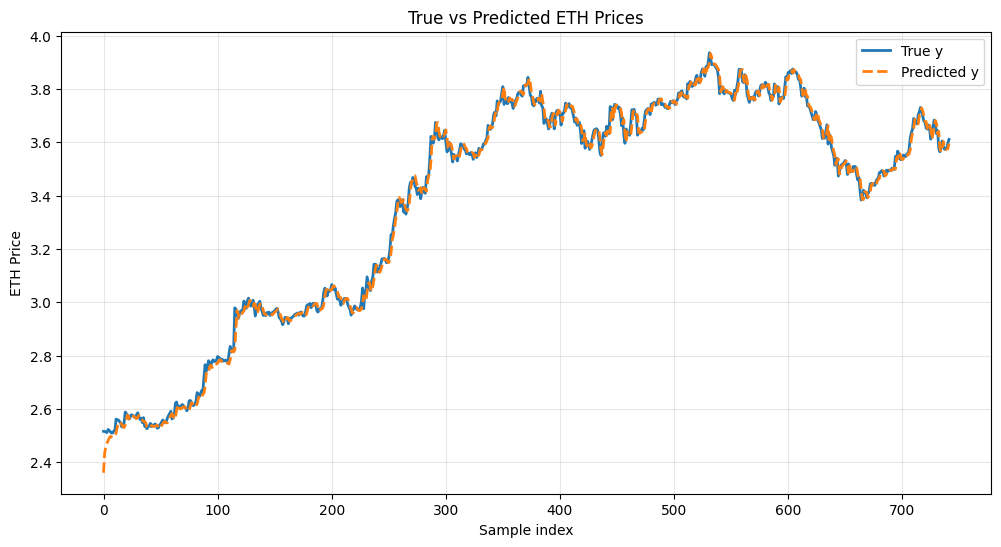

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# WEIGHT RLS

y_pred_list = []
beta = 0.99
P = np.identity(4)
theta = np.array([0,0,0,0]).reshape(-1,1) 

for row, y_t in zip(A, y): 
    row = row.reshape(-1, 1)    # (n, 1) 列向量
    newsample = row @ row.T  # (n, n) 外积
    theta = theta + (P @ row) * (y_t - row.T @ theta) / (beta + row.T @ P @ row)
    P = 1/beta * (P - (P @ newsample @ P)/(beta+ row.T @ P @ row))
    predict = row.T @ theta
    y_pred_list.append(predict)
    

# 处理预测值 - 从array列表提取数值
y_pred_clean = [float(pred[0][0]) for pred in y_pred_list]

# 处理真实值 - 从二维数组变成一维
y_true_clean = y.flatten()

# 画图
plt.figure(figsize=(12, 6))
plt.plot(y_true_clean, label="True y", linewidth=2)
plt.plot(y_pred_clean, label="Predicted y", linestyle="--", linewidth=2)
plt.xlabel("Sample index")
plt.ylabel("ETH Price")
plt.legend()
plt.title("True vs Predicted ETH Prices")
plt.grid(True, alpha=0.3)
plt.show()






Condition number: [16.187232298871795, 31.503394655399962, 46.956234165730095, 62.54969158419269, 78.27514520051761, 94.21275594997911, 110.35578416003239, 126.60938651092782, 142.96784774438504, 159.46915917375694, 176.18592948544338, 193.1391100487301, 210.540364339323, 228.36120076032384, 246.3445569401438, 264.46605638627983, 282.70702789979737, 300.9965150103294, 319.4173229849777, 338.12544051779616, 357.3375379269543, 376.9849727119918, 396.7263908785784, 416.5206029523918, 436.45921939496037, 456.71477148477413, 477.2765322498293, 498.015625654046, 518.9041997645048, 539.9356627677571, 561.2456740316966, 582.9164043930829, 604.7459344059242, 626.6025685594635, 648.6262772756174, 670.7785229216862, 693.1665241021675, 715.6694993024404, 738.1496204419857, 760.7770424415919, 783.6105061014064, 806.7526350302651, 830.234481806906, 853.9307224776239, 877.8163832674267, 901.9756384733073, 926.409211767183, 951.140837779458, 975.9639811539597, 1000.9253699295211, 1026.2362773346817, 1

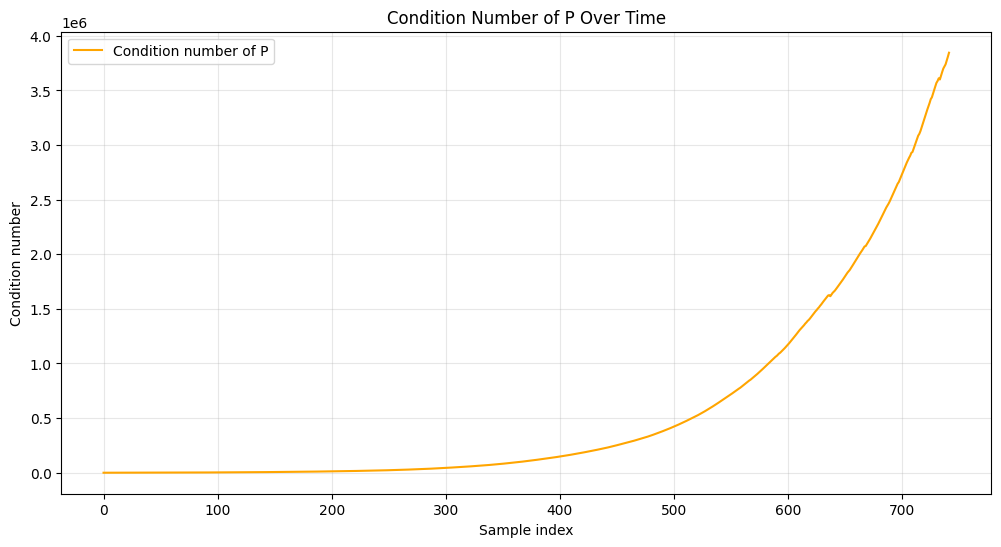

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# contidional for P
log_cond_P = []  # 记录每一步的P的条件数
beta = 0.99
P = np.identity(4)
theta = np.array([0, 0, 0, 0]).reshape(-1, 1)

for row, y_t in zip(A, y):
    row = row.reshape(-1, 1)    # (4, 1) 列向量
    newsample = row @ row.T     # (4, 4) 外积

    theta = theta + (P @ row) * (y_t - row.T @ theta) / (beta + row.T @ P @ row)
    P = 1/beta * (P - (P @ newsample @ P)/(beta + row.T @ P @ row))
    predict = row.T @ theta
    
    cond_num = np.linalg.cond(P)

    log_cond_P.append(cond_num)  
print("Condition number:", log_cond_P)
# plot
plt.figure(figsize=(12, 6))
plt.plot(log_cond_P, label="Condition number of P", color='orange')
plt.xlabel("Sample index")
plt.ylabel("Condition number")
plt.legend()
plt.title("Condition Number of P Over Time")
plt.grid(True, alpha=0.3)
plt.show()